## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df.count()
mouse_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_df[mouse_study_df.duplicated()]
# Print the resultant Dataframe
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_study_df.loc[mouse_study_df["Mouse ID"]=='g989',:]

# Print the resultant Dataframe 
duplicate 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_working = mouse_study_df.drop(labels=duplicate.index,axis=0)

mouse_study_working.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_working['Mouse ID'].nunique()
#mouse_study_working.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupby_regimen = mouse_study_working.groupby("Drug Regimen")
mean = groupby_regimen[["Tumor Volume (mm3)"]].mean()
median= groupby_regimen[["Tumor Volume (mm3)"]].median()
variance = groupby_regimen[["Tumor Volume (mm3)"]].var()
standard_deviation = groupby_regimen[["Tumor Volume (mm3)"]].std()
sem = groupby_regimen[["Tumor Volume (mm3)"]].sem()

# Assemble the resulting series into a single summary dataframe.regimen_summary_stats
merge1 = pd.merge(mean, median, how="left", on=["Drug Regimen"], suffixes=('_a', '_b'))
merge2 = pd.merge(merge1, variance, how="left", on=["Drug Regimen"],suffixes=('_c'))
merge3 = pd.merge(merge2, standard_deviation, how="left", on=["Drug Regimen"], suffixes=('_d'))
merge_complete = pd.merge(merge3, sem, how="left", on=["Drug Regimen"], suffixes=('_e'))

merge_complete_table = merge_complete.rename(columns={"Tumor Volume (mm3)_a": "Tumor Volume Mean",
                      "Tumor Volume (mm3)_b": "Tumor Volume Median",
                      "Tumor Volume (mm3)_": "Tumor Volume Variance",
                      "Tumor Volume (mm3)d": "Tumor Volume STD",
                      "Tumor Volume (mm3)": "Tumor Volume SEM"}).round(4)
merge_complete_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_working.groupby('Drug Regimen').agg(
        # Get the mean of the 'Tumor Volume (mm3)
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        # Get the median of the 'Tumor Volume (mm3)
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
        # Get the variance of the 'Tumor Volume (mm3)
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
        # Get the standard deviation of the 'Tumor Volume (mm3)
        Tumor_Vol_STD=('Tumor Volume (mm3)', np.std),
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)
).round(4)

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_STD,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [9]:
Summary2=mouse_study_working[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
Summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

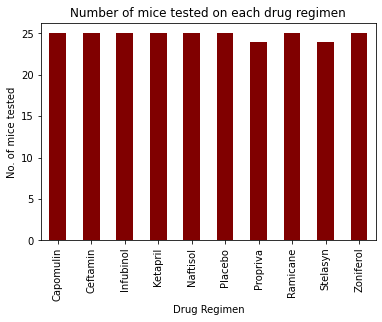

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

no_of_mice = groupby_regimen['Mouse ID'].nunique()
no_of_mice.plot(kind="bar", color = "maroon")

plt.xlabel("Drug Regimen") 
plt.ylabel("No. of mice tested") 
plt.title("Number of mice tested on each drug regimen") 
plt.show() 

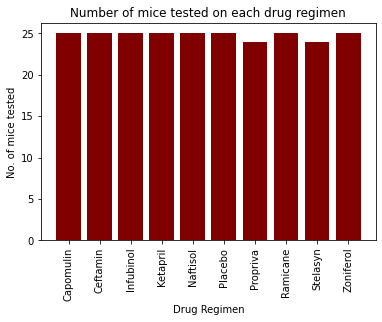

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
no_of_mice = groupby_regimen['Mouse ID'].nunique()
plt.bar(x_axis, no_of_mice, color ='maroon')
plt.xticks(x_axis, rotation="vertical")

plt.xlabel("Drug Regimen") 
plt.ylabel("No. of mice tested") 
plt.title("Number of mice tested on each drug regimen") 
plt.show() 

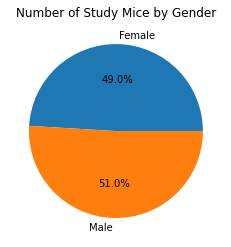

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study_working.groupby(["Sex"])["Mouse ID"].count().plot.pie(title="Number of Study Mice by Gender",label="",autopct="%1.1f%%")


C:\Users\melis\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Mice by gender')

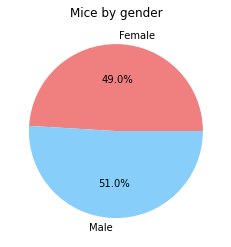

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender=mouse_study_working.groupby("Sex")[['Mouse ID']].count()
colors=["lightcoral", "lightskyblue"]
plt.pie(gender, labels = gender.index, colors = colors, autopct ="%1.1f%%")
plt.title('Mice by gender')

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_treatment_data = mouse_study_working.loc[(mouse_study_working["Drug Regimen"]=="Capomulin")|(mouse_study_working["Drug Regimen"]=="Ramicane")|(mouse_study_working["Drug Regimen"]=="Infubinol")|(mouse_study_working["Drug Regimen"]=="Ceftamin") ,:]
top_treatment_data.head(10)
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = top_treatment_data.groupby("Mouse ID")["Timepoint"].max()
final_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_final_timepoint = pd.merge(top_treatment_data[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]], final_timepoint, on=["Mouse ID", "Timepoint"], how="right")
merged_final_timepoint.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,45,22.050126
1,Capomulin,s185,45,23.343598
2,Capomulin,x401,45,28.484033
3,Capomulin,m601,45,28.430964
4,Ramicane,g791,45,29.128472


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
top_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in top_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_study_drugs = merged_final_timepoint.loc[merged_final_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_list.append(mouse_study_drugs)
    
    quartiles = mouse_study_drugs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    print(f"The lower quartile of tumor volume for {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {treatment} is: {upperq}")
    print(f"The interquartile range of tumor volume for {treatment} is: {iqr}")
    print(f"The the median of tumor volume for {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-------------------------------------------------")
    

The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The the median of tumor volume for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------
The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The the median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------
The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for

Text(0, 0.5, 'Tumor volume (mm3)')

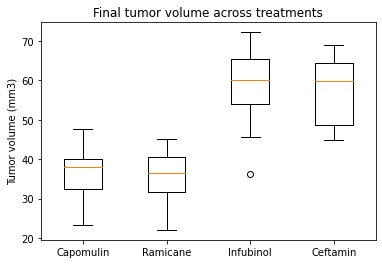

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels=top_treatments)
plt.title('Final tumor volume across treatments')
plt.ylabel('Tumor volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor volume (mm3)')

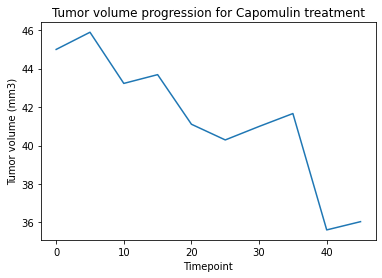

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = mouse_study_working.loc[mouse_study_working["Drug Regimen"] == "Capomulin"]
Capomulin

w914 = Capomulin.loc[Capomulin["Mouse ID"] == "w914"]
w914

plt.plot(w914["Timepoint"], w914["Tumor Volume (mm3)"])
plt.title('Tumor volume progression for Capomulin treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor volume (mm3)')

Text(0, 0.5, 'Tumor volume (mm3)')

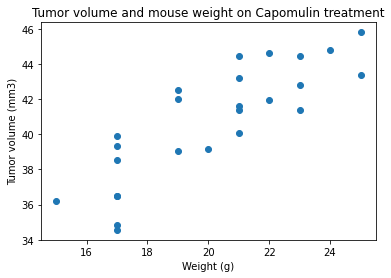

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = mouse_study_working.loc[mouse_study_working["Drug Regimen"] == "Capomulin"]
Capomulin_mean = Capomulin.groupby("Mouse ID").mean()

plt.scatter(Capomulin_mean["Weight (g)"], Capomulin_mean["Tumor Volume (mm3)"])
plt.title('Tumor volume and mouse weight on Capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor volume (mm3)')

## Correlation and Regression

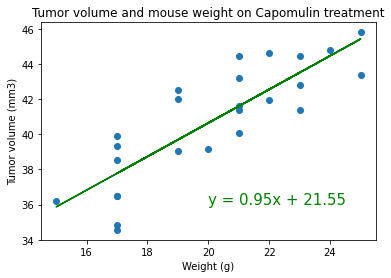

The linear regression equation is: y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_mean["Weight (g)"]
y_values = Capomulin_mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(20,36),fontsize=15,color="green")
plt.title('Tumor volume and mouse weight on Capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")